# Named Entity Recognition

In [2]:
# ---------------------------------------------------------------------------- #
#                               Imports and setup                              #
# ---------------------------------------------------------------------------- #


# pandas
import pandas as pd

# seaborn
import seaborn as sns
sns.set_palette('Reds')

# numpy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger

plt.rcParams["figure.figsize"] = (16, 10)
matplotlib_axes_logger.setLevel('ERROR')

# parse dataset
%run "src/generate_detailed_stats.py"

words_count_data, entity_types_count_data, max_length = collect_stats("entity-tag")

In [3]:
words_count = pd.DataFrame.from_dict(words_count_data, orient="index").sort_values(0, ascending=False).reset_index()
words_count.columns = ["Word", "Count"]

entity_types_count = pd.DataFrame.from_dict(entity_types_count_data, orient="index").sort_values(0, ascending=False).reset_index()
entity_types_count.columns = ["Entity Type", "Count"]

## Words

### Word occurences

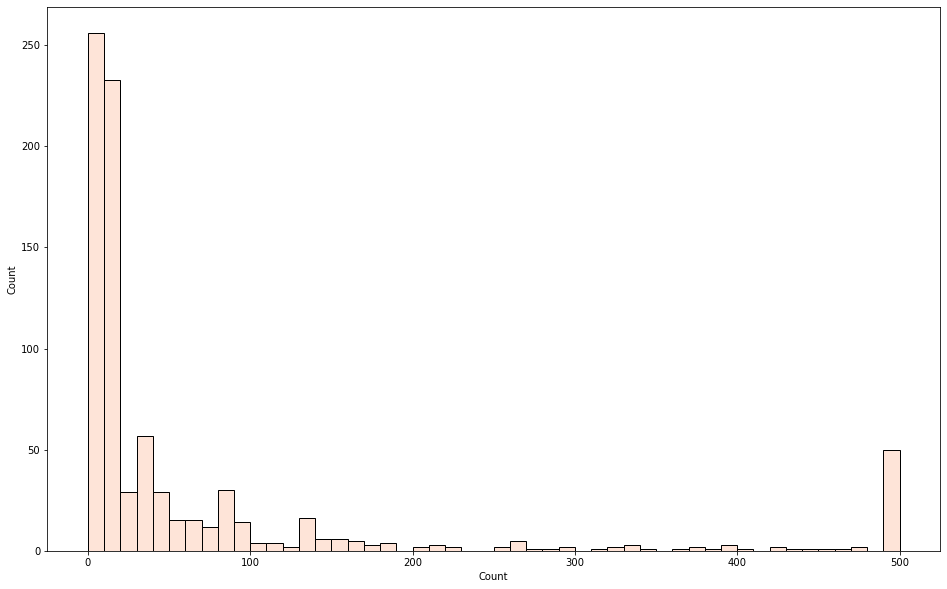

In [12]:
def plot_histplot():
    bins = np.arange(0, 510, 10)
    sns.histplot(data=np.clip(words_count["Count"], bins[0], bins[-1]), bins=bins)
    
plot_histplot()

In [5]:
words_count.select_dtypes("number").describe()

,Count
count,831.000000
mean,137.947052
std,522.017931
min,1.000000
25%,6.000000
50%,13.000000
75%,62.000000
max,8245.000000


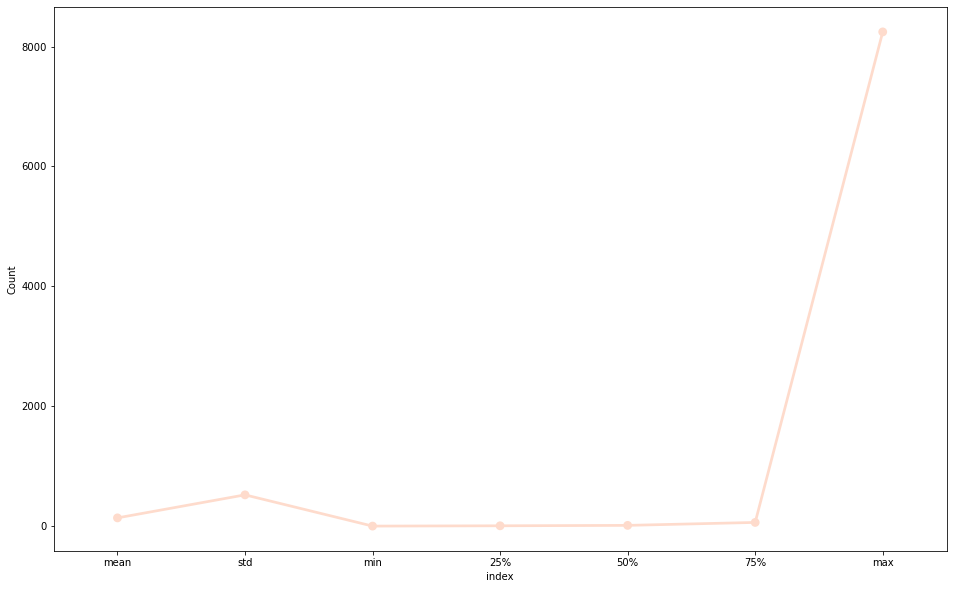

In [6]:
def plot_stats():
    stats = words_count.select_dtypes("number").describe()
    stats.reset_index(inplace=True)
    stats = stats[stats["index"] != "count"]
    
    for col in stats.columns[1:]:
        sns.pointplot(data=stats, x="index", y=col)
    
plot_stats()

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(words_count)

,Word,Count
0,តើ,8245
1,មាន,6000
2,នៅ,4920
3,ទេ,4441
4,ឬ,3157
5,ណា,2560
6,ប្រទេស,2538
7,បាន,2393
8,អត់,2097
9,អ្នក,1978


## Entities

In [8]:
entity_types_count

,Entity Type,Count
0,GPE,2179
1,PER,2037
2,ORG,1267
3,FLOOR,1012
4,ROOM,791
5,BUILD,198
6,ANN,112
7,TIME,40
8,DATE,12


<AxesSubplot:xlabel='Entity Type', ylabel='Count'>

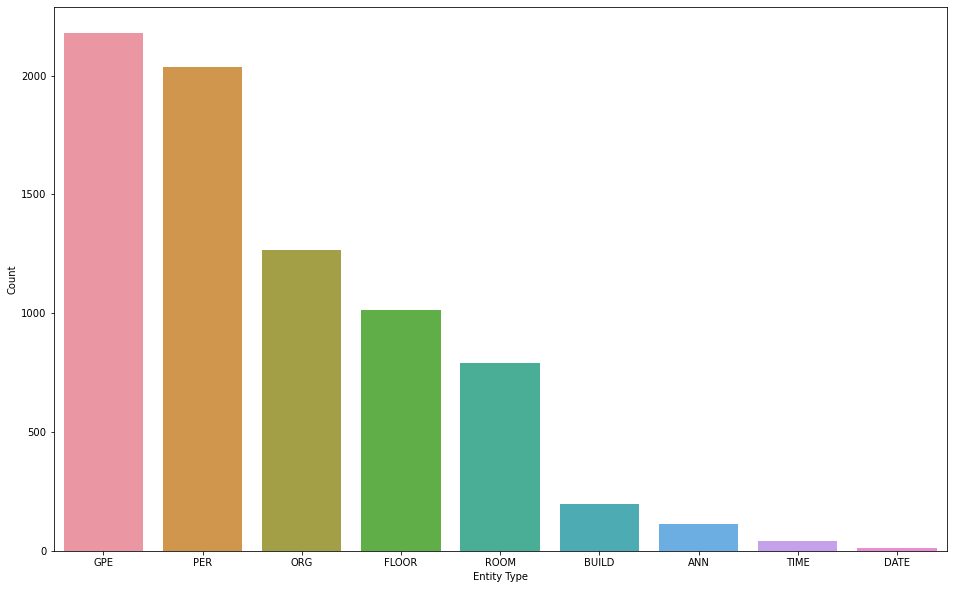

In [9]:
sns.barplot(data=entity_types_count, x="Entity Type", y="Count")

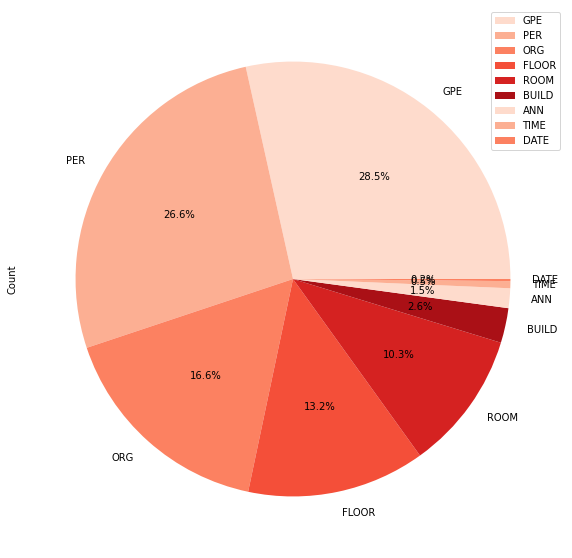

In [10]:
def plot_pieplot():
    entity_types_count.set_index("Entity Type").plot.pie(y="Count", autopct='%.1f%%')
    
plot_pieplot()